In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:

liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [3]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
print('Num rows: ',liver_data.shape[0])
print('Num cols: ',liver_data.shape[1])
print(liver_data.isnull().sum())


Num rows:  500
Num cols:  11
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64


In [5]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [6]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,496.000000,500.000000
mean,44.5860,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.960907,1.300000
std,16.5334,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.294289,0.458717
min,4.0000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000
25%,32.7500,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.795000,1.000000
50%,45.0000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000
75%,58.0000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000
max,85.0000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000


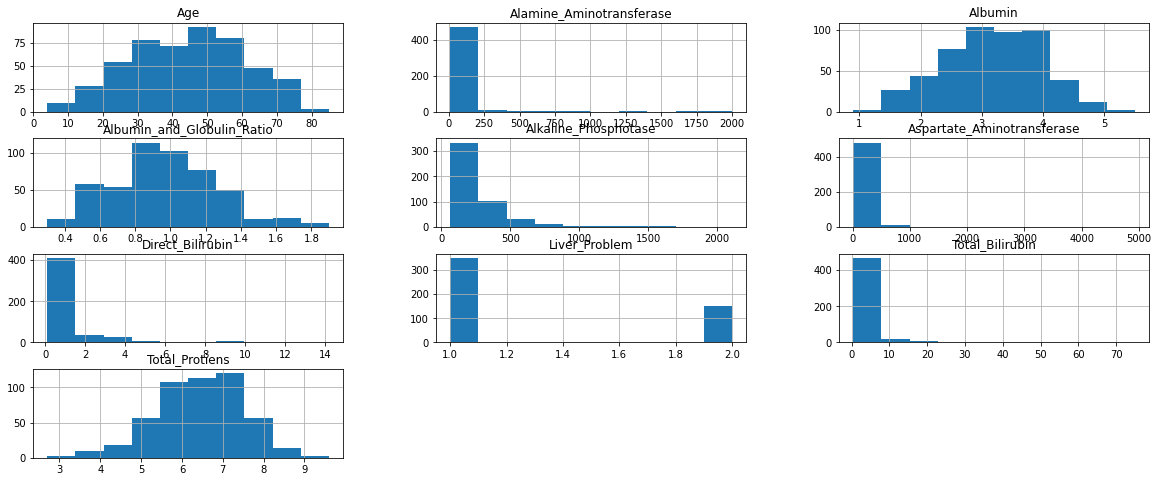

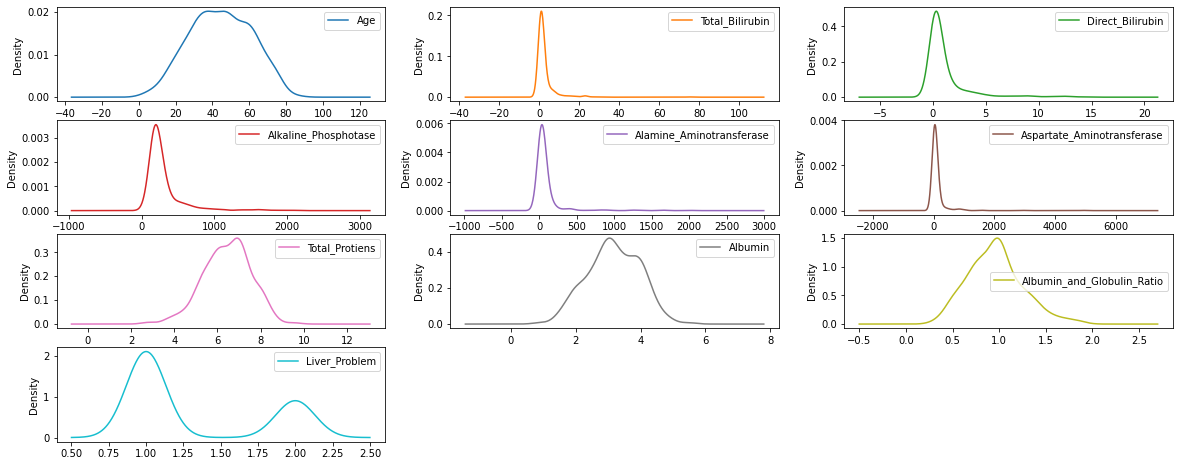

In [7]:
liver_data.hist(figsize=(20,8));
liver_data.plot(kind='density',sharex=False,layout=(4,3),figsize=(20,8),subplots=True);

In [8]:
liver_data['Liver_Problem'].unique()

array([1, 2])

In [9]:
liver_data['Liver_Problem']=liver_data['Liver_Problem'].replace(2,0)

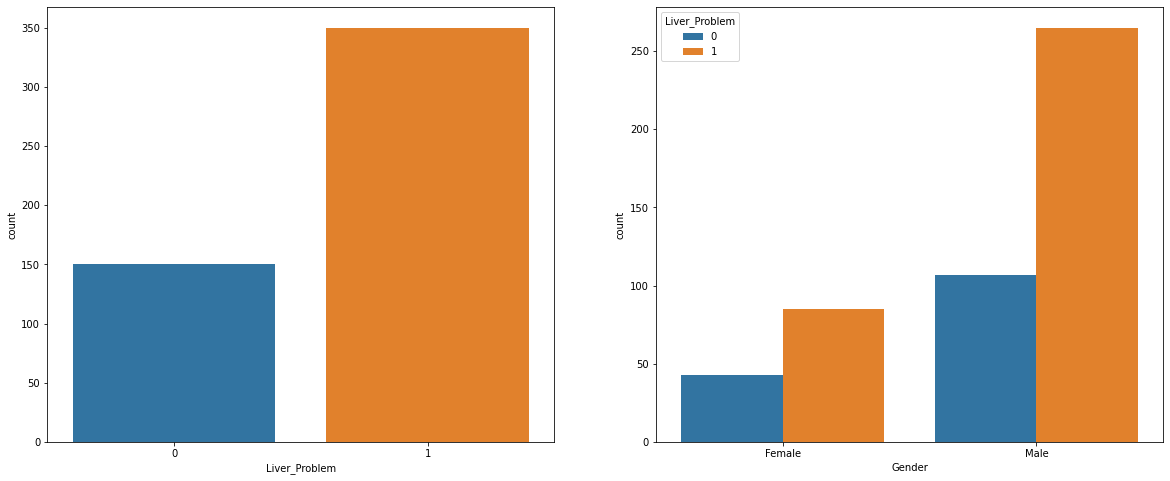

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
sns.countplot(liver_data['Liver_Problem'],ax=ax1)
sns.countplot(liver_data['Gender'],hue=liver_data['Liver_Problem'],ax=ax2)
plt.show()

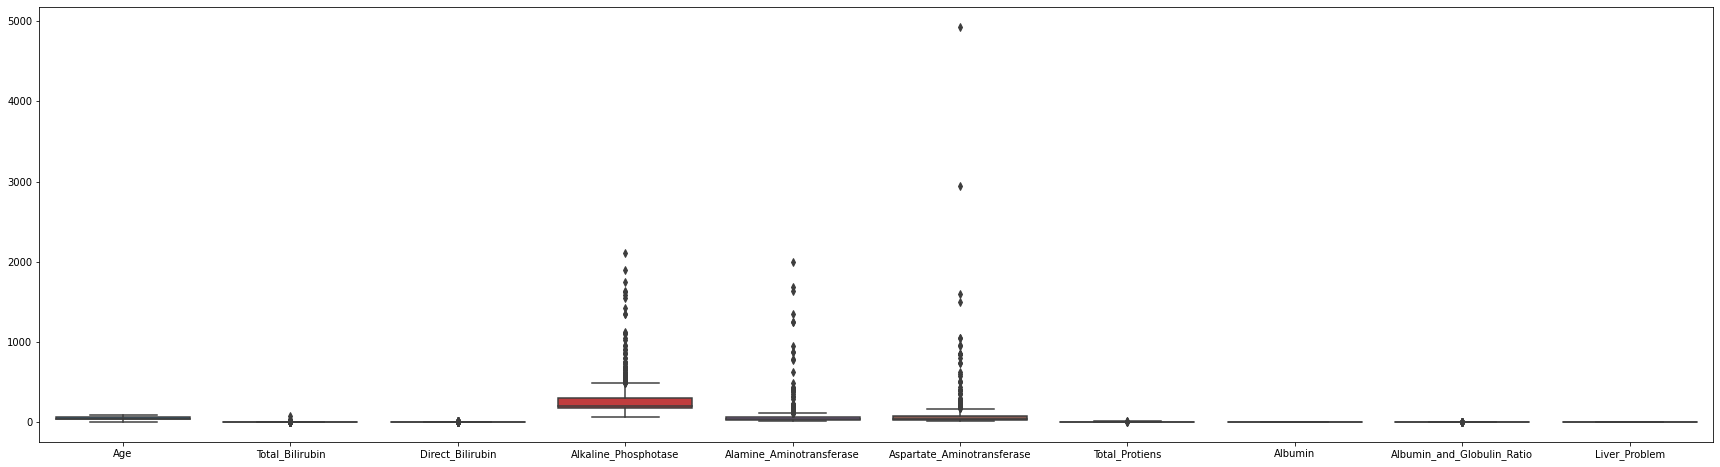

In [11]:
fig,ax1=plt.subplots(figsize=(30,8))
sns.boxplot(data=liver_data,ax=ax1)

In [12]:
liver_data=liver_data[liver_data['Alkaline_Phosphotase']<liver_data['Alkaline_Phosphotase'].quantile(0.95)]
liver_data=liver_data[liver_data['Alamine_Aminotransferase']<liver_data['Alamine_Aminotransferase'].quantile(0.95)]
liver_data=liver_data[liver_data['Aspartate_Aminotransferase']<liver_data['Aspartate_Aminotransferase'].quantile(0.95)]

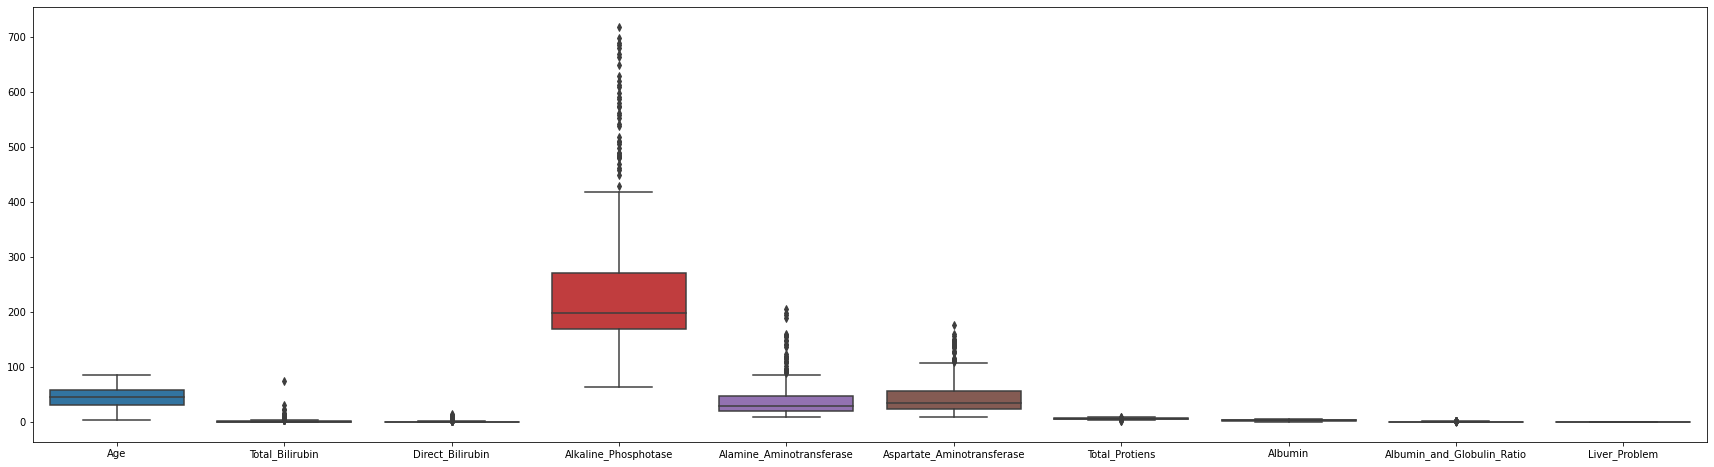

In [13]:
fig,ax1=plt.subplots(figsize=(30,8))
sns.boxplot(data=liver_data,ax=ax1)

In [14]:
liver_data.shape

(425, 11)

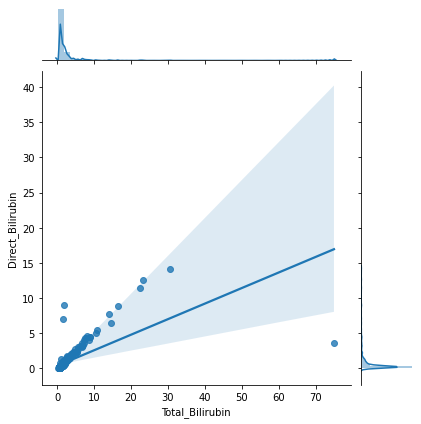

In [15]:
sns.jointplot(x=liver_data['Total_Bilirubin'],y=liver_data['Direct_Bilirubin'],kind='reg');

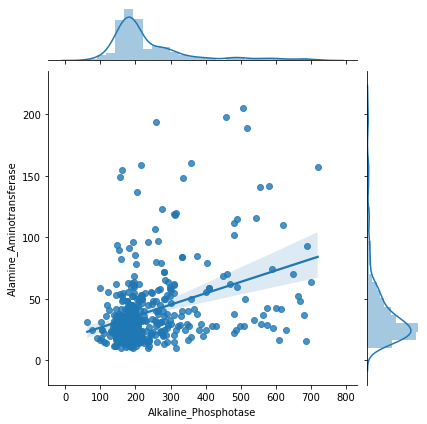

In [16]:
sns.jointplot(x=liver_data['Alkaline_Phosphotase'],y=liver_data['Alamine_Aminotransferase'],kind='reg');

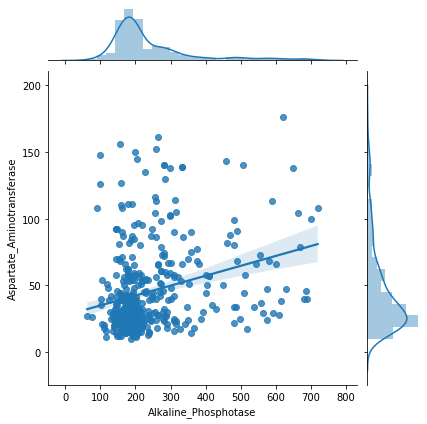

In [17]:
sns.jointplot(x=liver_data['Alkaline_Phosphotase'],y=liver_data['Aspartate_Aminotransferase'],kind='reg');

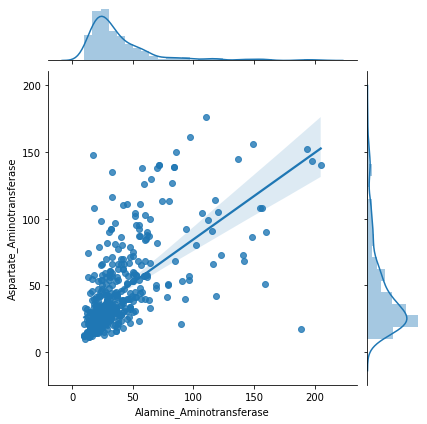

In [18]:
sns.jointplot(x=liver_data['Alamine_Aminotransferase'],y=liver_data['Aspartate_Aminotransferase'],kind='reg');

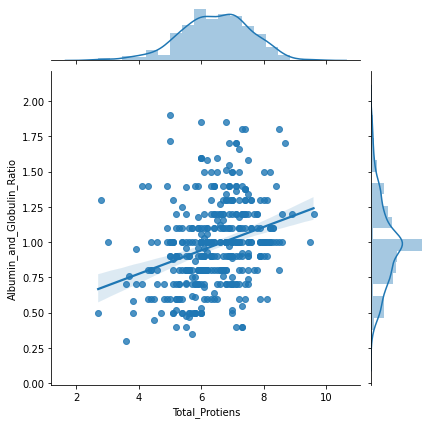

In [19]:
sns.jointplot(x=liver_data['Total_Protiens'],y=liver_data['Albumin_and_Globulin_Ratio'],kind='reg');

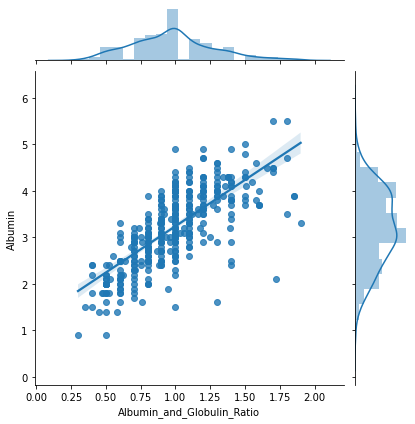

In [20]:
sns.jointplot(x=liver_data['Albumin_and_Globulin_Ratio'],y=liver_data['Albumin'],kind='reg');


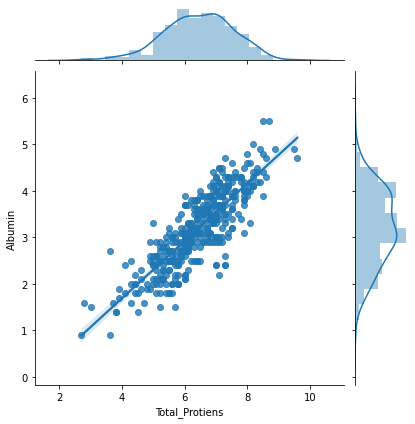

In [21]:
sns.jointplot(x=liver_data['Total_Protiens'],y=liver_data['Albumin'],kind='reg');

In [22]:
corr_matrix=liver_data.corr()
print(corr_matrix["Liver_Problem"].sort_values(ascending=False))
#columns = corr_matrix.nlargest(10, 'price').index



Liver_Problem                 1.000000
Alkaline_Phosphotase          0.211606
Direct_Bilirubin              0.194903
Alamine_Aminotransferase      0.186147
Aspartate_Aminotransferase    0.178935
Age                           0.154344
Total_Bilirubin               0.138670
Total_Protiens               -0.033088
Albumin                      -0.136831
Albumin_and_Globulin_Ratio   -0.170719
Name: Liver_Problem, dtype: float64


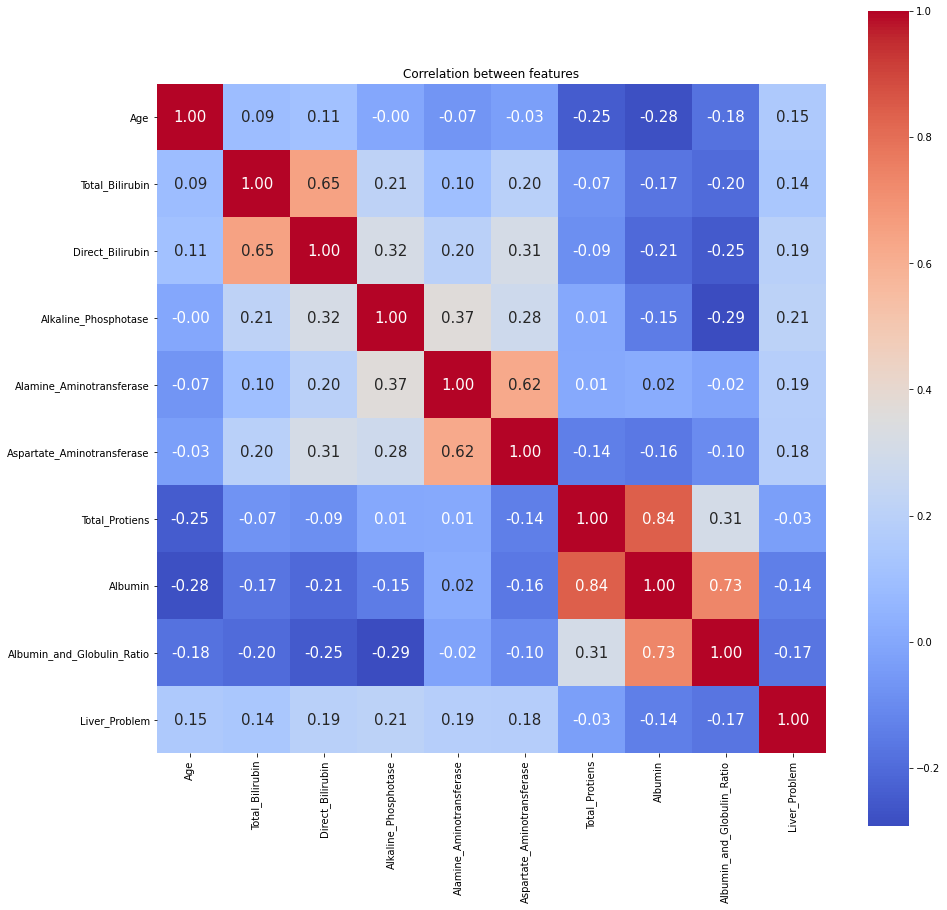

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

As we can observe from jointplots and correlation matrix, there is a strong relation between

1.   Total_Bilirubin  and  Direct_Bilirubin
2.   Alamine_Aminotransferase and Aspartate_Aminotransferase
3.   Total_Protiens and Albumin 
4.   Albumin and Albumin_and_Globulin_Ratio

So I will be keeping the following features, rest I can drop;


*   Total_Bilirubin
*   Alamine_Aminotransferase
*   Total_Protiens
*   Age
*   Gender
*   Alkaline_Phosphotase
*   Albumin_and_Globulin_Ratio














In [24]:
liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [25]:
liver_data['Gender']=pd.get_dummies(liver_data['Gender'])

In [26]:
vif = [variance_inflation_factor(liver_data.values, i) for i in range(liver_data.shape[1])]
pd.DataFrame({'VIF':vif,'Columns':liver_data.columns})

,VIF,Columns
0,7.970940,Age
1,1.422092,Gender
2,2.062369,Total_Bilirubin
3,2.446762,Direct_Bilirubin
4,6.519068,Alkaline_Phosphotase
5,5.050199,Alamine_Aminotransferase
6,5.625811,Aspartate_Aminotransferase
7,148.915233,Total_Protiens
8,214.676068,Albumin
9,42.855434,Albumin_and_Globulin_Ratio


Baseline model

In [38]:
y=liver_data['Liver_Problem']
X=liver_data.drop(columns=['Liver_Problem'])

In [39]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'VIF':vif,'Columns':X.columns})

,VIF,Columns
0,7.819535,Age
1,1.422086,Gender
2,2.062090,Total_Bilirubin
3,2.439515,Direct_Bilirubin
4,6.470020,Alkaline_Phosphotase
5,4.999341,Alamine_Aminotransferase
6,5.621917,Aspartate_Aminotransferase
7,144.326145,Total_Protiens
8,210.754553,Albumin
9,42.639270,Albumin_and_Globulin_Ratio


In [40]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [42]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
train_accuracy=logreg.score(x_train,y_train)
test_accuracy=logreg.score(x_test,y_test)
print('Training score: ',train_accuracy)
print('Testing score: ',test_accuracy)

Training score:  0.6565656565656566
Testing score:  0.7109375


In [43]:
kfold = KFold(n_splits=5,random_state=42)
logmodel = LogisticRegression()
results = cross_val_score(logmodel, x_train,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.61666667 0.61666667 0.71186441 0.62711864 0.54237288]
Accuracy: 62.293785310734464


In [44]:
y_pred_baseline=logreg.predict(x_test)

In [45]:
accuracy=accuracy_score(y_test,y_pred_baseline)
conf_mat=confusion_matrix(y_test,y_pred_baseline)
print('Accuracy score of Model:',accuracy*100)
print('Confusion Matrix:\n ',conf_mat)

Accuracy score of Model: 71.09375
Confusion Matrix:
  [[11 35]
 [ 2 80]]


In [46]:
recall=recall_score(y_test,y_pred_baseline)
precision=precision_score(y_test,y_pred_baseline)

print('Recall/Sensitivity: ',recall)
print('Precision: ',precision)

Recall/Sensitivity:  0.975609756097561
Precision:  0.6956521739130435


Actual modelling using hypermeters and vif

In [149]:
y=liver_data['Liver_Problem']
#dropping because of multicolinearity and based on vif
drop_columns=['Liver_Problem','Albumin','Aspartate_Aminotransferase','Direct_Bilirubin']
X=liver_data.drop(columns=drop_columns)

In [150]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'VIF':vif,'Columns':X.columns})

,VIF,Columns
0,6.034897,Age
1,1.412767,Gender
2,1.276732,Total_Bilirubin
3,6.042274,Alkaline_Phosphotase
4,3.171750,Alamine_Aminotransferase
5,22.210645,Total_Protiens
6,13.392915,Albumin_and_Globulin_Ratio


In [151]:
logreg=LogisticRegression()
grid={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}# l1 lasso l2 ridge
logreg_hyp=GridSearchCV(logreg,grid,cv=10,scoring='precision')
logreg_hyp.fit(x_train,y_train)


print("tuned hyperparameters: ",logreg_hyp.estimator)
print("accuracy :",logreg_hyp.best_score_)

tuned hyperparameters:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy : 0.6778274318274318


In [152]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=50)

In [153]:
logreg_hyp.fit(x_train,y_train)
train_accuracy=logreg_hyp.score(x_train,y_train)
test_accuracy=logreg_hyp.score(x_test,y_test)
print('Training score: ',train_accuracy)
print('Testing score: ',test_accuracy)



Training score:  0.676923076923077
Testing score:  0.7027027027027027


In [154]:
y_pred_hyp=logreg_hyp.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_hyp)
conf_mat=confusion_matrix(y_test,y_pred_hyp)
print('Accuracy score of Model:',accuracy*100)
print('Confusion Matrix:\n ',conf_mat)

recall=recall_score(y_test,y_pred_hyp)
precision=precision_score(y_test,y_pred_hyp)

print('Recall/Sensitivity: ',recall)
print('Precision: ',precision)

Accuracy score of Model: 69.53125
Confusion Matrix:
  [[11 33]
 [ 6 78]]
Recall/Sensitivity:  0.9285714285714286
Precision:  0.7027027027027027


Saving pickle file


In [155]:
# open a file, where you ant to store the data
file = open('liver_classification.pkl', 'wb')

# dump information to that file
pickle.dump(logreg_hyp, file)